In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from sklearn.metrics import mean_squared_error
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn import svm
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import preprocessing
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['master.csv']


(22256, 8)
Index(['country', 'year', 'sex', 'age', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.1421044  0.05043746 0.15434213 0.1926258  0.26396454 0.06752434
 0.11857528 0.01042606]
mean squared error 0.8517497996396127


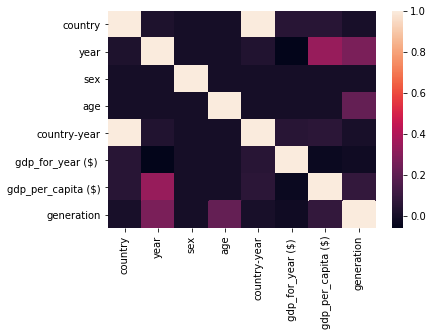

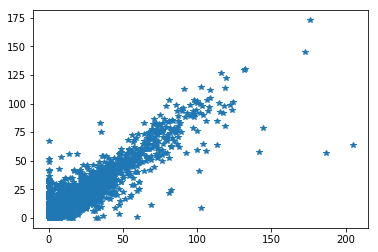

In [72]:
df = pd.read_csv ('../input/master.csv')
target = df['suicides/100k pop']
#plt.figure(1)
#df.hist( figsize=(10, 10))

df.drop(['suicides/100k pop', 'suicides_no','population'],axis= 1, inplace=True)

#print ([any(df[i].isnull()) for i in df.columns  ])

df.drop([i for i in df.columns if any(df[i].isnull()) ],axis= 1, inplace=True)

le = preprocessing.LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'O':
        le.fit (df[i])
        df[i]  = le.transform(df[i])

df.head
#print (df)
corr = df.corr()
#print (corr)
plt.figure(2)

sns.heatmap (corr,xticklabels=df.columns, yticklabels=df.columns)

#plt.figure(3)

#df.hist( figsize=(10, 10))

X_train,X_test,Y_train,Y_test=train_test_split(df,target,test_size=0.2,random_state=0)

print (X_train.shape)
print (X_train.columns)
model = RandomForestRegressor ()
model.fit (X_train, Y_train)
print(model.feature_importances_)
Y_pred= model.predict (X_test)
ac_score= metrics.explained_variance_score (Y_test,Y_pred)
#ac_score= accuracy_score (Y_test, Y_pred)
print ('mean squared error',ac_score)
plt.figure(4)

plt.plot (Y_test, Y_pred,'*')
plt.show()
